In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## don't show warning
import warnings
warnings.filterwarnings('ignore')

# Keras on Tensorflow

In [2]:
## for keras
from tensorflow import keras
from tensorflow.keras import layers

## for metrics
from sklearn.metrics import confusion_matrix

## for my functions
import testml as tml
from importlib import reload

# Generate Data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Define

In [4]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[28, 28]))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

2022-09-06 15:37:28.894527: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-06 15:37:28.904143: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Compile

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
			  optimizer="sgd", metrics=["accuracy"])

# Fit

In [7]:
history = model.fit(X_train, y_train, epochs=10,
					validation_data=(X_valid, y_valid), 
                    verbose=0)

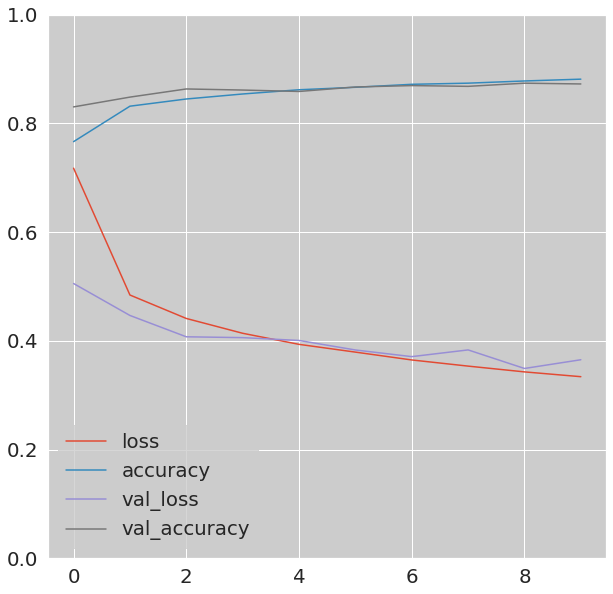

In [8]:
tml.lrplot(history.history)

# Evaluate

In [9]:
model.evaluate(X_test, y_test, verbose=0)

[84.36748504638672, 0.8083999752998352]

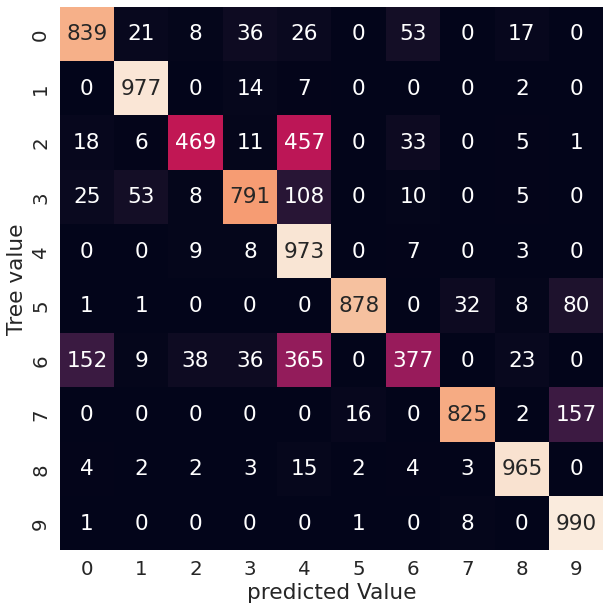

In [10]:
y_pred = np.argmax(model.predict(X_test),axis=1)
cmat = confusion_matrix(y_test, y_pred)
tml.cmplot(cmat)

# Predict

In [11]:
X_new = X_test[:3]
y_new = y_test[:3]

In [12]:
y_proba = model.predict(X_new)
y_class=np.argmax(y_proba,axis=1)
np.c_[y_class, y_new]

array([[9, 9],
       [2, 2],
       [1, 1]])